# Project 2 -  Ames Iowa: Alternative to the Boston Housing Data Set

#### By: Najiha Boosra: [Github]()

## Problem Statement

For creating a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale.In this project, in particular, we will likely find that EDA, data cleaning, and exploratory visualizations will constantly feed back into each other. If the purpose in building the model is simply to allow a typical buyer or real estate agent to sit down and estimate the selling price of a house, such transformations may be unnecessary or inappropriate for the task at hand.
We strongly make this point in the situation where data are being analyzed for research purposes that will be shared with a larger audience and the primary and secondary stakeholders.


# Executive Summary

## Table of Contents

- **[Loading Data](#Data-import-read)**  

- **[Data Cleaning](#Data-Cleaning)**    

- **[EDA](#Exploratory-Data-Analysis)**  

- **[Model Preparation](#Modeling-baseline-Ridge-Lasso)**  

- **[Inferetial Visualization](#Visualize-the-data)**  

- **[Model Selection](**   

- **[Model Evalution]**  

- **[Conclusions and Recommendations](#Conclusions-and-Recommendations)**  

- **[References](#Reference)**   

- **[Kaggle Submission](#kaggle-submission)**

## Loading Data

In [171]:
import warnings
warnings.filterwarnings("ignore") 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 90210

In [172]:
ames = pd.read_csv("../datasets/train.csv") 
                    

In [173]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [174]:
ames.shape

(2051, 81)

## Data Cleaning

- Are missing values imputed appropriately?
- Are distributions examined and described?
- Are outliers identified and addressed?
- Are appropriate summary statistics provided?
- Are steps taken during data cleaning and EDA framed appropriately?
- Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?


In [176]:
ames.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [175]:
ames.Id.nunique()

2051

In [97]:
#droping ID and PID
ames.set_index('Id', inplace = True)
ames.drop(columns= 'PID', inplace = True)

In [98]:
#get nulls
ames.isnull().sum().sort_values(ascending = False).head(30)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Qual        114
Garage Cond        114
Garage Yr Blt      114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Qual           55
BsmtFin Type 1      55
Bsmt Cond           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Bsmt Unf SF          1
Total Bsmt SF        1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Cars          1
Garage Area          1
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
Roof Style           0
dtype: int64

In [177]:
#working with most null values

In [99]:
#all most value is null in Pool QC
ames['Pool QC'].value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: Pool QC, dtype: int64

In [100]:
#having no pools fill with NA
ames ['Pool QC'].fillna('NA', inplace = True)

In [101]:
ames['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

In [102]:
ames['Misc Feature'].fillna('NA', inplace=True)

Fence and Alley are two remaining features with mostly null values.we can establish conversion dictionary.we can convert these columns to a binary one where a value of 1 indicates that a property has a fence and a 0 indicates that the property has no fence.


In [103]:
ames['Fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [104]:
fence_quality = ['MnPrv', 'GdPrv', 'GdWo', 'MnWw']
for quality in fence_quality:
    ames.Fence = ames.Fence.str.replace(quality, '1')
ames.Fence.fillna(0, inplace=True)
ames.Fence = ames.Fence.apply(lambda x: int(x))
ames.Fence.head(10)

Id
109     0
544     0
153     0
318     0
255     0
138     0
2827    0
145     1
1942    1
1956    0
Name: Fence, dtype: int64

In [105]:
ames['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [106]:
alley_quality = ['Grvl', 'Pave']
for quality in alley_quality:
    ames.Alley = ames.Alley.str.replace(quality, '1')
ames.Alley.fillna(0, inplace=True)
ames.Alley = ames.Alley.apply(lambda x: int(x))
ames.Alley.head(10)

Id
109     0
544     0
153     0
318     0
255     0
138     0
2827    0
145     0
1942    0
1956    0
Name: Alley, dtype: int64

In [107]:
#dropping Fireplace Qu
ames.drop(columns = 'Fireplace Qu', inplace = True)

In [108]:
# Creating funtion to find out which columns has null values #mask using
def has_null(col):
    null_mask = (ames[col].isnull())
    print(ames[null_mask])
    return

has_null('Garage Cars')

      MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Alley Lot Shape  \
Id                                                                            
2237           70        RM          50.0      9060   Pave      0       Reg   

     Land Contour Utilities Lot Config  ... Screen Porch Pool Area Pool QC  \
Id                                      ...                                  
2237          Lvl    AllPub     Inside  ...            0         0      NA   

     Fence Misc Feature Misc Val  Mo Sold  Yr Sold  Sale Type  SalePrice  
Id                                                                        
2237     1           NA        0        3     2007        WD      150909  

[1 rows x 78 columns]


In [109]:
ames.loc[2237, ames.columns.str.contains('Garage')]

Garage Type      Detchd
Garage Yr Blt       NaN
Garage Finish       NaN
Garage Cars         NaN
Garage Area         NaN
Garage Qual         NaN
Garage Cond         NaN
Name: 2237, dtype: object

In [110]:
ames.drop(index=2237, inplace=True)


In [111]:
ames[ames['Garage Type'].isnull() &
   ames['Garage Yr Blt'].isnull() &
   ames['Garage Finish'].isnull() &
   ames['Garage Qual'].isnull() &
   ames['Garage Cond'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2243,190,C (all),75.0,8250,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,NA,0,NA,0,6,2007,WD,119600
330,160,RM,21.0,1476,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,NA,0,NA,0,3,2010,WD,76000
2278,20,RL,70.0,8402,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,NA,0,NA,0,12,2007,New,147000
2235,50,RM,50.0,7288,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,NA,0,NA,0,9,2007,WD,129850
2084,30,RL,58.0,9098,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,NA,0,NA,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,90,RL,94.0,9400,Pave,0,Reg,Low,AllPub,Corner,...,0,0,NA,0,NA,0,4,2010,WD,139000
2880,30,C (all),69.0,12366,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,NA,0,NA,0,10,2006,WD,51689
2628,90,RL,75.0,8512,Pave,0,Reg,Lvl,AllPub,Corner,...,0,0,NA,0,NA,0,9,2006,WD,119000


In [112]:
#droping year of garage 
ames.drop(columns = 'Garage Yr Blt', inplace=True)

#filling NA with other garage col
ames['Garage Type'].fillna('NA', inplace=True)
ames['Garage Finish'].fillna('NA', inplace=True)
ames['Garage Qual'].fillna('NA', inplace=True)
ames['Garage Cond'].fillna('NA', inplace=True)

In [113]:
basement_cols = ames.columns[ames.columns.str.contains('Bsmt')]

ames[basement_cols].isnull().sum()

Bsmt Qual         55
Bsmt Cond         55
Bsmt Exposure     58
BsmtFin Type 1    55
BsmtFin SF 1       1
BsmtFin Type 2    56
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
dtype: int64

In [114]:
has_null('BsmtFin SF 1')

      MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Alley Lot Shape  \
Id                                                                            
1342           20        RM          99.0      5940   Pave      0       IR1   

     Land Contour Utilities Lot Config  ... Screen Porch Pool Area Pool QC  \
Id                                      ...                                  
1342          Lvl    AllPub        FR3  ...            0         0      NA   

     Fence Misc Feature Misc Val  Mo Sold  Yr Sold  Sale Type  SalePrice  
Id                                                                        
1342     1           NA        0        4     2008      ConLD      79000  

[1 rows x 77 columns]


In [115]:
ames.loc[1342, basement_cols]

Bsmt Qual         NaN
Bsmt Cond         NaN
Bsmt Exposure     NaN
BsmtFin Type 1    NaN
BsmtFin SF 1      NaN
BsmtFin Type 2    NaN
BsmtFin SF 2      NaN
Bsmt Unf SF       NaN
Total Bsmt SF     NaN
Bsmt Full Bath    NaN
Bsmt Half Bath    NaN
Name: 1342, dtype: object

In [116]:
ames.loc[1342, 'Total Bsmt SF'] = 0
ames.loc[1342, 'Bsmt Full Bath'] = 0
ames.loc[1342, 'Bsmt Half Bath'] = 0
ames.loc[1342, 'Bsmt Unf SF'] = 0
ames.loc[1342, 'BsmtFin SF 2'] = 0
ames.loc[1342, 'BsmtFin SF 1'] = 0
ames.loc[1342, 'Bsmt Qual'] = 'NA'
ames.loc[1342, 'Bsmt Cond'] = 'NA'
ames.loc[1342, 'Bsmt Exposure'] = 'NA'
ames.loc[1342, 'BsmtFin Type 1'] = 'NA'
ames.loc[1342, 'BsmtFin Type 2'] = 'NA'

In [117]:
has_null('Bsmt Full Bath')

      MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Alley Lot Shape  \
Id                                                                            
1498           20        RL         123.0     47007   Pave      0       IR1   

     Land Contour Utilities Lot Config  ... Screen Porch Pool Area Pool QC  \
Id                                      ...                                  
1498          Lvl    AllPub     Inside  ...            0         0      NA   

     Fence Misc Feature Misc Val  Mo Sold  Yr Sold  Sale Type  SalePrice  
Id                                                                        
1498     0           NA        0        7     2008        WD      284700  

[1 rows x 77 columns]


In [118]:
ames.loc[1498, basement_cols]

Bsmt Qual         NaN
Bsmt Cond         NaN
Bsmt Exposure     NaN
BsmtFin Type 1    NaN
BsmtFin SF 1        0
BsmtFin Type 2    NaN
BsmtFin SF 2        0
Bsmt Unf SF         0
Total Bsmt SF       0
Bsmt Full Bath    NaN
Bsmt Half Bath    NaN
Name: 1498, dtype: object

In [119]:
ames.loc[1498, 'Bsmt Full Bath'] = 0
ames.loc[1498, 'Bsmt Half Bath'] = 0

In [120]:
no_basement = (ames['Total Bsmt SF'] == 0)

In [121]:
ames[no_basement][basement_cols].head()

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
Id,,,,,,,,,,,
807,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
811,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
781,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
888,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1554,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


we will write a function to fill all the null categories and pass the dataframe through it.

In [122]:
def fill_basement_nulls(data):
    for row in data.index:
        if data.loc[row, 'Total Bsmt SF'] == 0:
            data.loc[row, 'Bsmt Qual'] = 'NA'
            data.loc[row, 'Bsmt Cond'] = 'NA'
            data.loc[row, 'Bsmt Exposure'] = 'NA'
            data.loc[row, 'BsmtFin Type 1'] = 'NA'
            data.loc[row, 'BsmtFin Type 2'] = 'NA'
    return

fill_basement_nulls(ames)

In [123]:
ames[basement_cols].isnull().sum()

Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     3
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    1
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
dtype: int64

In [124]:
# properties with basement Na
has_null('Bsmt Exposure')



      MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Alley Lot Shape  \
Id                                                                            
1797           60        FV          81.0     10411   Pave      0       Reg   
67             20        RL          73.0      8987   Pave      0       Reg   
2780           60        RL          65.0     14006   Pave      0       IR1   

     Land Contour Utilities Lot Config  ... Screen Porch Pool Area Pool QC  \
Id                                      ...                                  
1797          Lvl    AllPub     Corner  ...            0         0      NA   
67            Lvl    AllPub     Inside  ...            0         0      NA   
2780          Lvl    AllPub     Inside  ...            0         0      NA   

     Fence Misc Feature Misc Val  Mo Sold  Yr Sold  Sale Type  SalePrice  
Id                                                                        
1797     0           NA        0        7     2007        New  

In [125]:
ames.drop(index=1797, inplace=True)
ames.drop(index=67, inplace=True)
ames.drop(index=2780, inplace=True)

In [126]:
has_null('BsmtFin Type 2')

     MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Alley Lot Shape  \
Id                                                                           
445           20        RL          85.0     10655   Pave      0       IR1   

    Land Contour Utilities Lot Config  ... Screen Porch Pool Area Pool QC  \
Id                                     ...                                  
445          Lvl    AllPub     Inside  ...            0         0      NA   

    Fence Misc Feature Misc Val  Mo Sold  Yr Sold  Sale Type  SalePrice  
Id                                                                       
445     0           NA        0       10     2009        WD      284000  

[1 rows x 77 columns]


In [127]:
ames.loc[445, basement_cols]

Bsmt Qual           Gd
Bsmt Cond           TA
Bsmt Exposure       No
BsmtFin Type 1     GLQ
BsmtFin SF 1      1124
BsmtFin Type 2     NaN
BsmtFin SF 2       479
Bsmt Unf SF       1603
Total Bsmt SF     3206
Bsmt Full Bath       1
Bsmt Half Bath       0
Name: 445, dtype: object

In [128]:
ames.loc[445, 'BsmtFin Type 2'] = 'Rec'

In [129]:
ames[ames['Mas Vnr Area'].isnull() &
   ames['Mas Vnr Type'].isnull()].head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2393,60,RL,103.0,12867,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,NA,0,NA,0,7,2006,New,344133
2383,20,RL,107.0,13891,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,NA,0,NA,0,9,2006,New,465000
539,20,RL,67.0,10083,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,NA,0,NA,0,8,2009,WD,184900
518,20,FV,90.0,7993,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,NA,0,NA,0,10,2009,New,225000
2824,20,RL,75.0,8050,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,NA,0,NA,0,4,2006,WD,117250


In [130]:
ames['Mas Vnr Area'].fillna(0, inplace=True)
ames['Mas Vnr Type'].fillna('None', inplace=True)


In [131]:
#imputing mean values
ames['Lot Frontage'].fillna(value=ames['Lot Frontage'].mean(), inplace= True)

In [132]:
ames.isnull().sum().sum()

0

## EDA

In [133]:
ames.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,60,RL,69.059406,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,...,0,0,NA,0,NA,0,3,2010,WD,130500
544,60,RL,43.000000,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,...,0,0,NA,0,NA,0,4,2009,WD,220000
153,20,RL,68.000000,7922,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,NA,0,NA,0,1,2010,WD,109000
318,60,RL,73.000000,9802,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,NA,0,NA,0,4,2010,WD,174000
255,50,RL,82.000000,14235,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,NA,0,NA,0,3,2010,WD,138500


In [187]:
#deal with outliers
ames[ames['SalePrice'] < 40000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,...,0,0,NaN,NaN,NaN,0,2,2008,WD,13100
1292,2844,909101330,30,RL,60.0,8088,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,2,2006,ConLD,35000
1309,727,902477120,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdWo,NaN,0,11,2009,WD,34900
1428,1902,534450090,20,RL,50.0,5000,Pave,NaN,Reg,Low,...,0,0,NaN,NaN,NaN,0,1,2007,WD,39300
1518,2881,911175430,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,10,2006,WD,35311
1564,710,902205030,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdWo,NaN,0,5,2009,WD,37900
1628,182,902207130,30,RM,68.0,9656,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,12789


In [188]:
#droping low sale prices
ames.drop(index = 183, inplace = True)
ames.drop(index = 1628, inplace = True)

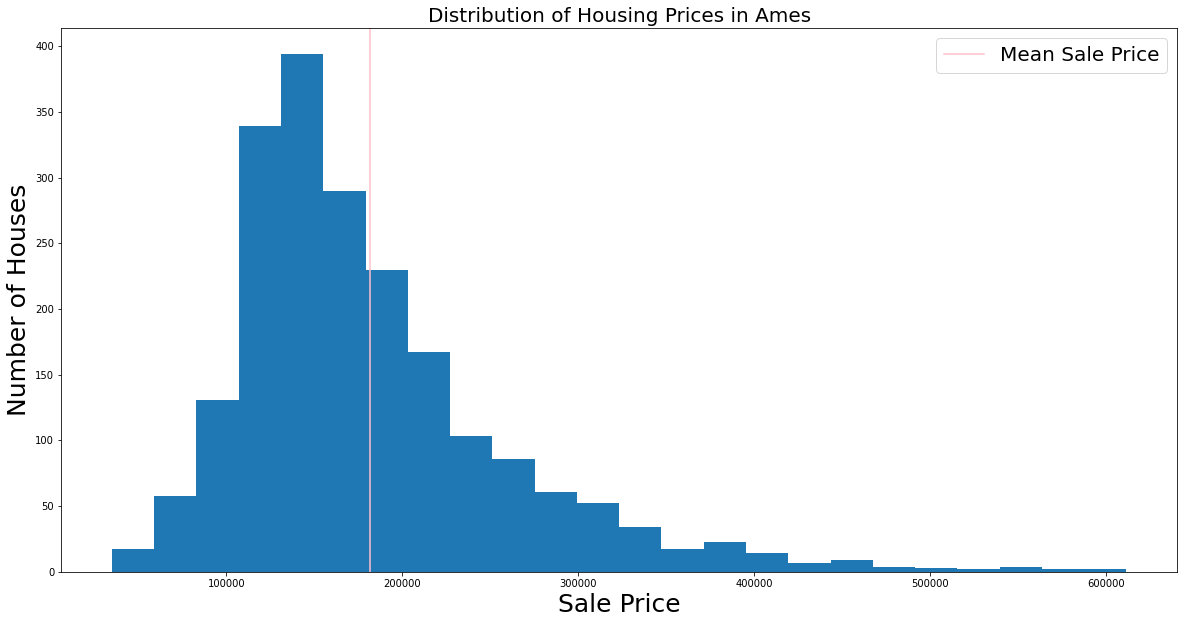

In [189]:
plt.figure(figsize=(20, 10))

plt.hist(ames.SalePrice, bins=24)
plt.title("Distribution of Housing Prices in Ames", fontsize=20)

plt.xlabel('Sale Price', fontsize=25)
plt.ylabel('Number of Houses', fontsize=25)

plt.axvline(ames.SalePrice.mean(), color='pink', label='Mean Sale Price')
plt.legend(fontsize=20);

The SalePrice values are right-skewed,so our model is likely to underpredict when it's incorrect. 

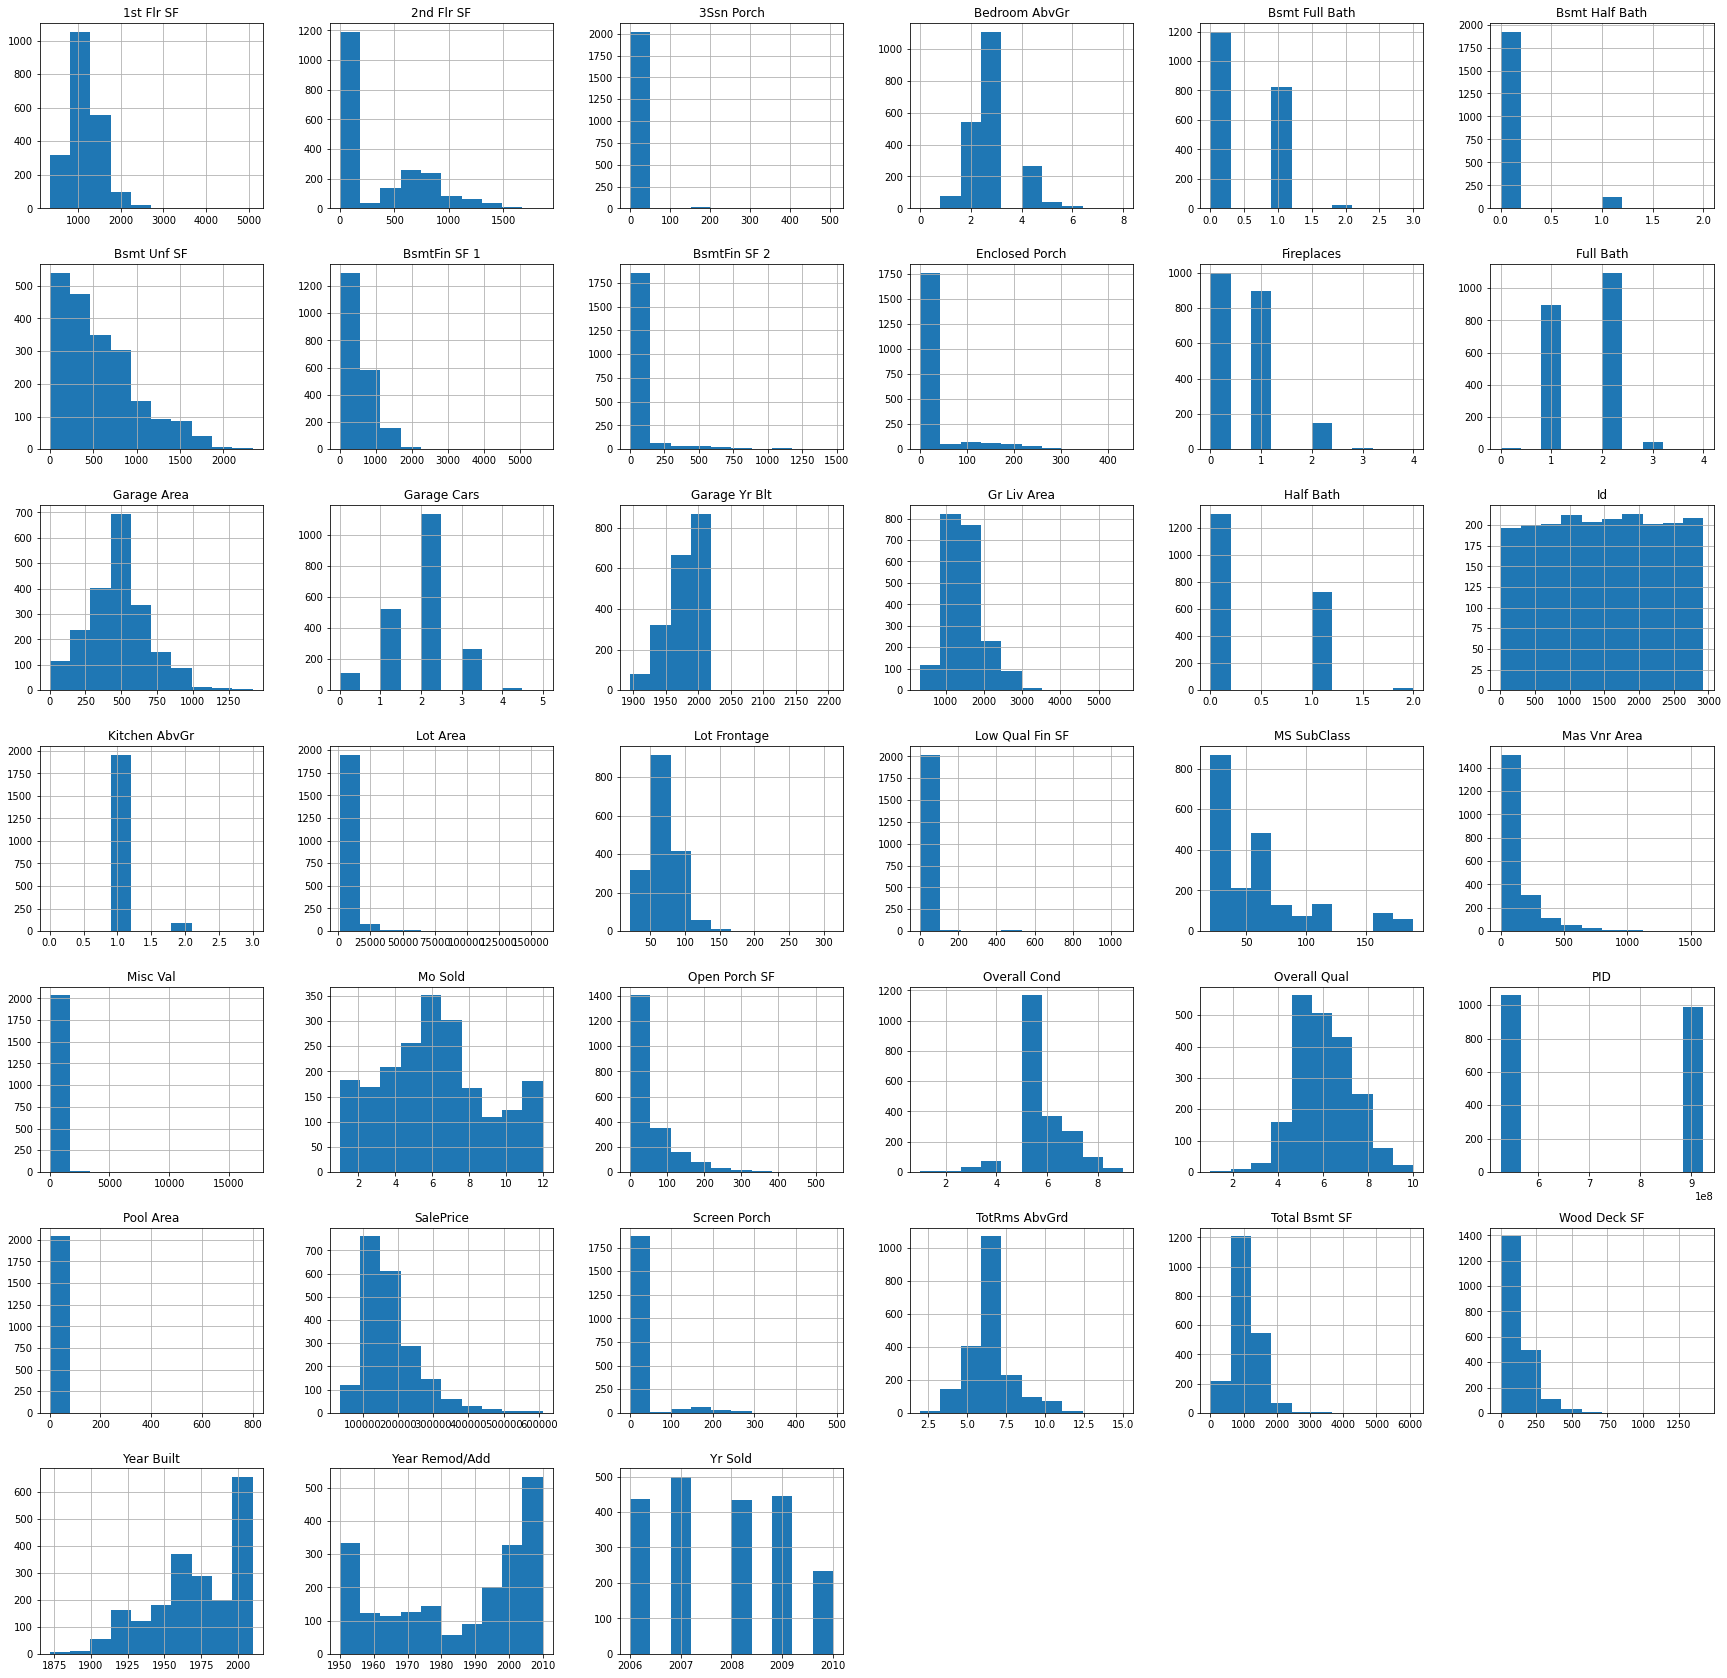

In [194]:
ames.hist(figsize=(30,30));

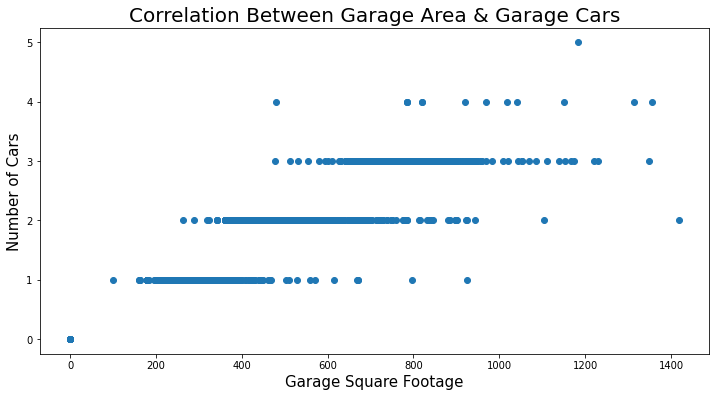

In [137]:
plt.figure(figsize=(12,6))

plt.scatter(x=ames['Garage Area'], y=ames['Garage Cars'])
plt.title(label='Correlation Between Garage Area & Garage Cars', fontsize=20)
plt.ylabel('Number of Cars', fontsize=15)
plt.xlabel('Garage Square Footage', fontsize=15);

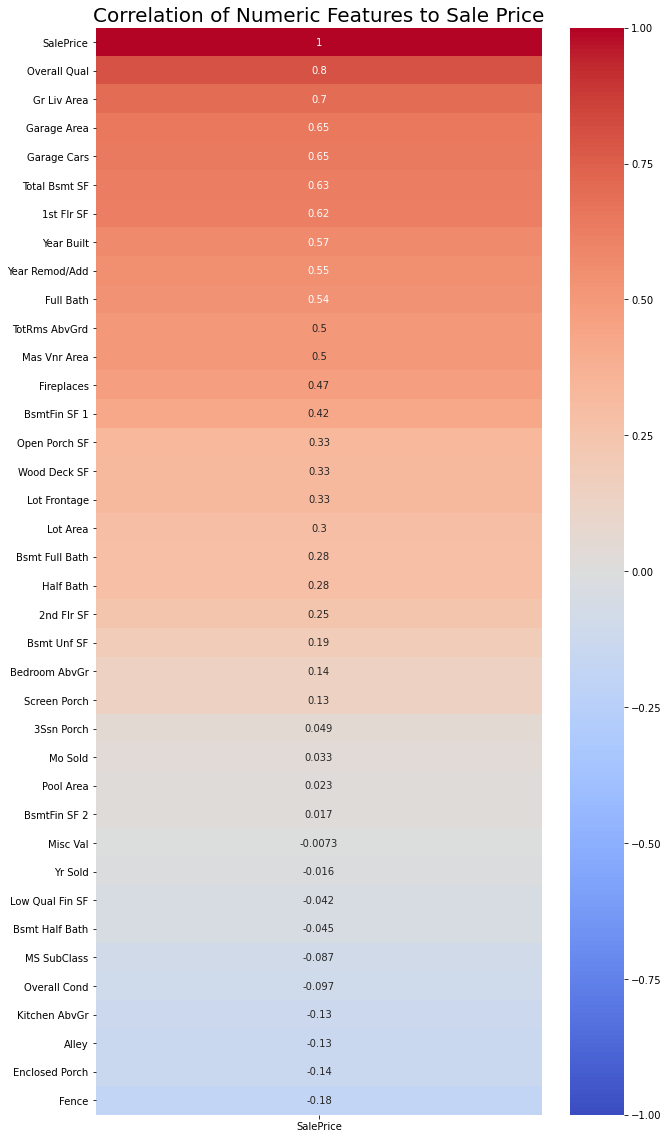

In [138]:
plt.figure(figsize=(10,20))

sns.heatmap(ames.corr()[['SalePrice']].sort_values('SalePrice', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(label='Correlation of Numeric Features to Sale Price', fontsize=20);

## Model Preparation

- **Establish your baseline score.**
- Fit linear regression. Look at your coefficients. Are any of them wildly overblown?
- Fit lasso/ridge/elastic net with default parameters.
- Go back and remove features that might be causing issues in your models.
- Tune hyperparameters.
- **Identify a production model.** (This does not have to be your best performing Kaggle model, but rather the model that best answers your problem statement.)
- Refine and interpret your production model.



## Modeling

### Train-Test-Split

In [139]:
# establish "X" and "y"
features = ["Overall Qual", "Lot Area", "Full Bath"]
X = ames[features]
y = ames["SalePrice"]

#tain / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

### Baseline Model

In the cell below, use cross_val_score to get a baseline  𝑅^2
  for our model.

###  Linear Regression

In [140]:
#instantiate model
lr = LinearRegression()

#fit model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
#train score
lr.score(X_train, y_train)

0.6868986822866816

In [142]:
#test score
lr.score(X_test, y_test) 

0.7465104883817393

In [143]:
cross_val_score(lr, X, y, cv =5).mean()

0.6912554531584647

## Ridge

In [144]:
ridge = RidgeCV(cv=5)

In [145]:
cross_val_score(ridge, X, y, cv =5).mean()

0.6911752117837942

## Lasso

In [146]:
lasso = LassoCV(cv=5)

In [147]:
cross_val_score(lasso, X, y, cv =5).mean()

0.041466776797190553

## Model Selection

Linear and Ridge are returning much better score than Lasso score. and they are reducing or eliminating the effect of collinear features. Since Linear model is slightly better so we will proceed with it.

In [148]:
preds = lr.predict(X_test)

In [149]:
(mean_squared_error(y_test, preds)) ** .5

39393.24198669349

This is a pretty good RMSE score. It means that on average the model will predict within $39,816.28 of the actual target. Now we will plot those predictions against the actual prices for those properties so the strength of the model can be judged visually.

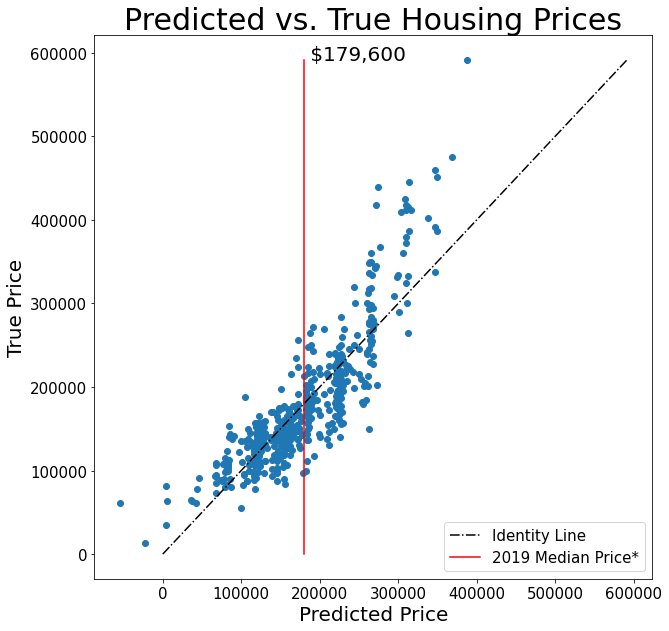

In [150]:
plt.figure(figsize=(10,10))

plt.scatter(preds, y_test, label=None)
plt.plot((0, y_test.max()), (0,y_test.max()), 'k-.', label='Identity Line')
plt.plot((179600, 179600), (0,y_test.max()), 'r-', label='2019 Median Price*')
plt.title('Predicted vs. True Housing Prices', fontsize=30)
plt.xlabel('Predicted Price', fontsize=20)
plt.ylabel('True Price', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.annotate(' $179,600', (179600,y_test.max()), fontsize=20)
plt.legend(fontsize=15, loc='lower right');

## Model Evaluation

In [151]:
features

['Overall Qual', 'Lot Area', 'Full Bath']

In [152]:
ames.mean()

MS SubClass            57.017587
Lot Frontage           69.059406
Lot Area            10064.131900
Alley                   0.068393
Overall Qual            6.111871
Overall Cond            5.562775
Year Built           1971.684416
Year Remod/Add       1984.152418
Mas Vnr Area           98.638495
BsmtFin SF 1          442.680997
BsmtFin SF 2           48.029311
Bsmt Unf SF           566.817782
Total Bsmt SF        1057.528090
1st Flr SF           1164.712750
2nd Flr SF            328.707865
Low Qual Fin SF         5.523693
Gr Liv Area          1498.944309
Bsmt Full Bath          0.427943
Bsmt Half Bath          0.063508
Full Bath               1.575965
Half Bath               0.371275
Bedroom AbvGr           2.843674
Kitchen AbvGr           1.042990
TotRms AbvGrd           6.435271
Fireplaces              0.591109
Garage Cars             1.775769
Garage Area           473.430386
Wood Deck SF           93.791402
Open Porch SF          47.602833
Enclosed Porch         22.512457
3Ssn Porch

In [153]:
lr.score(X_train, y_train)

0.6868986822866816

In [154]:
lr.score(X_test, y_test)

0.7465104883817393

## Conclusion & Recommendations

Our analysis began with a relatively clean dataset of over 2,000 home sales in Ames, IA between 2007 and 2010. We applied a linear regression model which highlighted the properties above-ground square footage as the most heavily-weighted feature in predicting sale price. Basement square footage, the build year, an overall quality rating of “excellent,” and square footage of finished basement rounded out the most influential features. The model currently has an r2 score of .734 and an RMSE of 39,816.28.

## References

Review the [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

-----

# Kaggle Submission



In [155]:
# Load validation set
val = pd.read_csv("../datasets/test.csv") 

In [156]:
val.shape

(878, 80)

In [157]:
val.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [158]:
val.isnull().sum().sort_values()

Id                0
Bsmt Unf SF       0
Yr Sold           0
Heating           0
Heating QC        0
               ... 
Fireplace Qu    422
Fence           706
Alley           820
Misc Feature    837
Pool QC         874
Length: 80, dtype: int64

In [159]:
val.shape

(878, 80)

In [160]:
val.fillna(0)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,0.0,9500,Pave,0,IR1,Lvl,...,0,185,0,0,0,0,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,0,Reg,Lvl,...,0,0,0,0,MnPrv,0,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,0,Reg,Lvl,...,0,0,0,0,GdWo,0,0,5,2007,WD


In [161]:
filtered_val = val[features]

In [162]:
filtered_val.head()

,Overall Qual,Lot Area,Full Bath
0,6,9142,2
1,5,9662,2
2,7,17104,2
3,5,8520,1
4,6,9500,1


In [163]:
#make prediction with model
preds = lr.predict(filtered_val)

In [164]:
preds[:10]

array([184710.16196095, 146901.95928565, 239710.82329034, 121050.21256895,
       161898.81703406,  68749.4280289 ,  82179.89620175, 122602.84441628,
       212166.81000922, 186702.63860053])

In [165]:
#We need to submit to Kaggle in the appropriate form of .csv
# create prediction Series
preds_col = pd.Series(preds, name = "SalePrice")
# combine with Id
id_col    = val["Id"]
output = pd.concat([id_col, preds_col], axis = 1)
output.head()

,Id,SalePrice
0,2658,184710.161961
1,2718,146901.959286
2,2414,239710.823290
3,1989,121050.212569
4,625,161898.817034


In [166]:
#write to csv
output.to_csv("../output/submission.csv", index = False)